# EEGDash example for sex classification

The code below provides an example of using the *EEGDash* library in combination with PyTorch to develop a deep learning model for detecting sex in a collection of 136 subjects.

1. **Data Retrieval Using EEGDash**: An instance of *EEGDashDataset* is created to search and retrieve resting state data for 136 subjects (dataset ds005505). At this step, only the metadata is transferred.

2. **Data Preprocessing Using BrainDecode**: This process preprocesses EEG data using Braindecode by selecting specific channels, resampling, filtering, and extracting 2-second epochs. This takes about 2 minutes.

3. **Creating a train and testing sets**: The dataset is split into training (80%) and testing (20%) sets with balanced labels--making sure also that we have as many males as females--converted into PyTorch tensors, and wrapped in DataLoader objects for efficient mini-batch training.

4. **Model Definition**: The model is a custom convolutional neural network with 24 input channels (EEG channels), 2 output classes (male and female).

5. **Model Training and Evaluation Process**: This section trains the neural network, normalizes input data, computes cross-entropy loss, updates model parameters, and evaluates classification accuracy over six epochs. This takes less than 10 seconds to a couple of minutes, depending on the device you use.



## Data Retrieval Using EEGDash

First we find one resting state dataset for a collection of subject. The dataset ds005505 contains 136 subjects with both male and female participants.

In [2]:

from eegdash import EEGDashDataset

ds_sexdata = EEGDashDataset({'dataset': 'ds005505', 'task': 'RestingState'}, target_name='sex', cache_dir='/mnt/nemar/openneuro')

## Data Preprocessing Using Braindecode

[BrainDecode](https://braindecode.org/stable/install/install.html) is a specialized library for preprocessing EEG and MEG data. 

We apply three preprocessing steps in Braindecode:
1.	**Selection** of 24 specific EEG channels from the original 128.
2.	**Resampling** the EEG data to a frequency of 128 Hz.
3.	**Filtering** the EEG signals to retain frequencies between 1 Hz and 55 Hz.

When calling the **preprocess** function, the data is retrieved from the remote repository.

Finally, we use **create_windows_from_events** to extract 2-second epochs from the data. These epochs serve as the dataset samples.

In [3]:
from braindecode.preprocessing import (preprocess, Preprocessor, create_fixed_length_windows)
import os

# Alternatively, if you want to include this as a preprocessing step in a Braindecode pipeline:
preprocessors = [
    Preprocessor('pick_channels', ch_names=['E22', 'E9', 'E33', 'E24', 'E11', 'E124', 'E122', 'E29', 'E6', 'E111', 'E45', 'E36', 'E104', 'E108', 'E42', 'E55', 'E93', 'E58', 'E52', 'E62', 'E92', 'E96', 'E70', 'Cz']),
    Preprocessor("resample", sfreq=128),
    Preprocessor("filter", l_freq=1, h_freq=55)
]
preprocess(ds_sexdata, preprocessors, n_jobs=-1) #, save_dir='xxxx'' will save and set preload to false

# extract windows and save to disk
windows_ds = create_fixed_length_windows(ds_sexdata, start_offset_samples=0, stop_offset_samples=None,
        window_size_samples=256, window_stride_samples=256, drop_last_window=True, preload=False) 
os.makedirs('data_tutorial/hbn_preprocessed_restingstate', exist_ok=True)
windows_ds.save('data_tutorial/hbn_preprocessed_restingstate', overwrite=True)

/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indica

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 62.23
commercial_use: Yes
full_pheno: Yes
p_factor: -0.8420000000000001
attention: -1.243
internalizing: -0.087
externalizing: -0.6409999999999999
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: unavailable
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 57.83
commercial_use: Yes
full_pheno: Yes
p_factor: -1.252
attention: -1.051
internalizing: 0.544
externalizing: -0.247
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55

/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 60.03
commercial_use: Yes
full_pheno: Yes
p_factor: 0.772
attention: -0.6409999999999999
internalizing: -0.498
externalizing: 1.365
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windo

/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: 0.281
attention: -0.081
internalizing: -0.555
externalizing: 0.483
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 52.29
commercial_use: Yes
full_pheno: Yes
p_factor: -1.714
attention: -0.853
internalizing: -0.118
externalizing: -0.333
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = m

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: 0.328
attention: -0.171
internalizing: 0.028
externalizing: -0.316
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: 2.144
attention: 0.307
internalizing: 0.93
externalizing: -0.27
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 1.592
attention: -0

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55

/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 1.143
attention: 0.4320000000000001
internalizing: -0.8370000000000001
externalizing: 1.344
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching ar

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 33.35
commercial_use: Yes
full_pheno: Yes
p_factor: -0.13699999999999998
attention: -1.2990000000000002
internalizing: -1.064
externalizing: 0.662
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 80.04
commercial_use: Yes
full_pheno: Yes
p_factor: -0.328
attention: -0.398
internalizing: -0.544
externalizing: 0.4970000000000001
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 80.04
commercial_use: Yes
full_pheno: Yes
p_factor: 0.435
attention: -0.34600000000000003
internalizing: 1.331
externalizing: -2.012
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 49.02
commercial_use: Yes

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -13.34
commercial_use: Yes
full_pheno: Yes
p_factor: -0.368
attention: 0.153
internalizing: -0.08900000000000001
externalizing: 0.41
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: available
surroundSupp_2: unavailable
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: -0.779
attention: -1.274
internalizing: -0.279
externalizing: -0.314
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: No
p_factor: -0.858
attention: -0.957
internalizing: -1.009
externalizing: 0.898
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeD

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -54.49
commercial_use: Yes
full_pheno: Yes
p_factor: 1.094
attention: 1.087
internalizing: 0.387
externalizing: 0.928
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: available
surroundSupp_2: unavailable
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Par

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -86.71
commercial_use: Yes
full_pheno: Yes
p_factor: -0.662
attention: -1.331
internalizing: -0.135
externalizing: -0.816
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 80.04
commercial_use: Yes
full_pheno: Yes
p_factor: -0.355
attention: 0.7170000000000001
internalizing: -1.45
externalizing: -0.448
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 0.6779999999999999
attention: 0.88
internalizing: 0.146
externalizing: -0.015
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -85.58
commercial_use: Yes
full_pheno: Yes
p_factor: 0.966
attention: 0.26
internalizing: 0.56
externalizing: 0.043
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: unavailable
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bi

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 36.69
commercial_use: Yes
full_pheno: Yes
p_factor: 1.737
attention: 1.075
internalizing: 1.045
externalizing: 1.314
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetec

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 13.34
commercial_use: Yes
full_pheno: Yes
p_factor: 0.14400000000000002
attention: 1.489
internalizing: 1.261
externalizing: 0.6859999999999999
RestingState: available
DespicableMe: unavailable
FunwithFractals: unavailable
ThePresent: unavailable
DiaryOfAWimpyKid: unavailable
contrastChangeDetection_1: available
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: available
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching a

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 46.69
commercial_use: Yes
full_pheno: Yes
p_factor: -0.8320000000000001
attention: 0.64
internalizing: 1.279
externalizing: 0.055
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 46.69
commercial_use: Yes
full_pheno: Yes
p_factor: 1.365
attention: -0.436
internalizing: 1.52
externalizing: -0.203
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: n/a
commercial_use: Yes
full_pheno: Yes
p_factor: 1.661
attention: 1.499
internalizing: 0.392
externalizing: 0.197
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetecti

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: -1.909
attention: -0.775
internalizing: -0.826
externalizing: -0.249
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 18.88
commercial_use: Yes
full_pheno: Yes
p_factor: -0.544
attention: -0.87
internalizing: 0.585
externalizing: 0.047
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: -1.493
attention: 0.6859999999999999
internalizing: 0.21600000000000005
externalizing: -0.446
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 77.84
commercial_use: Yes
full_p

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 1.181
attention: 0.542
internalizing: -0.861
externalizing: 0.605
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contr

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 73.37
commercial_use: Yes

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 0.5379999999999999
attention: 0.8490000000000001
internalizing: 0.319
externalizing: 0.693
RestingState: available
DespicableMe: unavailable
FunwithFractals: unavailable
ThePresent: unavailable
DiaryOfAWimpyKid: unavailable
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: -1.158
attention: -1.094
internalizing: -0.542
externalizing: 0.006
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mn

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 1.354
attention: -1.786
internalizing: -0.027000000000000003
externalizing: 1.685
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=Fals

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 80.04
commercial_use: Yes
full_pheno: Yes
p_factor: 0.467
attention: 1.826
internalizing: 1.949
externalizing: -0.926
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 71.17
commercial_use: Yes
full_pheno: Yes
p_factor: -0.603
attention: -0.446
internalizing: 1.248
externalizing: 0.325
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: 1.143
attention: -0.149
internalizing: 0.7120000000000001
externalizing: -0.713
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, v

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 6.67
commercial_use: Yes
full_pheno: Yes
p_factor: -0.269
attention: 0.809
internalizing: 0.278
externalizing: 0.537
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 66.7
commercial_use: Yes
full_pheno: No
p_factor: 0.13699999999999998
attention: 2.406
internalizing: -0.017
externalizing: -0.991
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: 0.481
attention: -1.085
internalizing: -1.124
externalizing: 0.13
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDete

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: -1.813
attention: -0.813
internalizing: -0.218
externalizing: -0.28800000000000003
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 84.51
commercial_use: Yes
full_pheno: Yes
p_factor:

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -100.05
commercial_use: Yes
full_pheno: Yes
p_factor: -0.623
attention: -1.351
internalizing: -0.408
externalizing: 1.334
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable t

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 81.17
commercial_use: Yes
full_pheno: Yes
p_factor: n/a
attention: n/a
internalizing: n/a
externalizing: n/a
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDe

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
e

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: -0.479
attention: -1.4240000000000002
internalizing: 1.374
externalizing: -0.463
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: av

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarn

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: -0.212
attention: -0.453
internalizing: 1.104
externalizing: -0.154
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the d

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 0.455
attention: 1.3769999999999998
internalizing: -0.185
externalizing: 0.929
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfA

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 90.05
commercial_use: Yes
full_pheno: Yes
p_factor: 0.867
attention: 1.783
internalizing: 0.947
externalizing: -1.325
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -100.05
commercial_use: Yes
full_pheno: Yes
p_factor: -0.848
attention: -1.24
internalizing: -0.943
externalizing: 0.327
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 60.03
commercial_use: Yes
full_pheno: Yes
p_factor: 0.001
attention: 0.12
internalizing: -0.957
externalizing: 0.126
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 96.72
commercial_use: Yes
full_pheno: Yes
p_factor: -0.192
attention: 0.973
internalizing: 0.047
externalizing: 0.246
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDete

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 66.7
commercial_use: Yes
full_pheno: Yes
p_factor: -0.486
attention: -0.29
internalizing: 0.081
externalizing: -0.195
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: -0.264
attention: -0.332
internalizing: 0.972
externalizing: 0.157
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDet

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 67.83
commercial_use: Yes
full_pheno: Yes
p_factor: 0.281
attention: -0.011
internalizing: -0.024
externalizing: 0.46
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: 0.8740000000000001
attention: -0.16
internalizing: 1.104
externalizing: 0.701
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: -0.258
attention: -0.425
internalizing: 1.006
externalizing: 0.509
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contr

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: 1.015
attention: -0.8290000000000001
internalizing: 0.307
externalizing: 0.528
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: avai

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 36.69
commercial_use: Yes
full_pheno: Yes
p_factor: -1.435
attention: -0.376
internalizing: 1.122
externalizing: -0.479
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 45.62
commercial_use: Yes
full_pheno: Yes
p_factor: 0.313
attention: 0.483
internalizing: 0.436
externalizing: 1.185
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrast

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 60.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 13.34
commercial_use: Yes
full_pheno: Yes
p_factor: -0.662
attention: -0.882
internalizing: -0.924
externalizing: 0.213
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: unavailable
contrastChangeDetection_1: available
contrastChangeDetection_2: 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 87.84
commercial_use: Yes
full_pheno: Yes
p_factor: -0.392
attention: -0.762
internalizing: -0.782
externalizing: 1.288
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 83.38
commercial_use: Yes
full_pheno: Yes
p_factor:

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 84.51
commercial_use: Yes
full_pheno: 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 84.51
commercial_use: Yes
full_pheno: Yes
p_factor: -1.724
attention: -0.8490000000000001
internalizing: -0.383
externalizing: -0.328
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: 0.755
attention: -0.611
internalizing: 0.487
externalizing: -0.324
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: 0.523
attention: -0.62
internalizing: -1.48
externalizing: 0.748
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -96.72
commercial_use: Yes
full_pheno: Yes
p_factor: -1.064
attention: -1.138
internalizing: 0.124
externalizing: -0.448
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
cont

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: No
p_factor: -0.8759999999999999
attention: -1.227
internalizing: 0.152
externalizing: 1.56
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -40.02
commercial_use: Yes
full_pheno: No
p_factor: -0.149
attention: 0.426
internalizing: -0.149
externalizing: 0.131
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_j

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 53.36
commercial_use: Yes

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: -1.079
attention: 0.969
internalizing: -1.131
externalizing: -0.7070000000000001
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: av

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 51.16
commercial_use: Yes
full_pheno: Yes
p_factor: -0.247
attention: -1.545
internalizing: 0.067
externalizing: -0.6709999999999999
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 0.926
attention: 0.015
internalizing: 1.859
externalizing: 0.038
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 77.84
commercial_use: Yes
full_pheno: Yes
p_factor: -0.065
attention: 0.17
internalizing: -0.7759999999999999
externalizing: -0.455
RestingState: available
DespicableMe: unavailable
FunwithFractals: unavailable
ThePresent: unavailable
DiaryOfAWimpyKid: unavailable
contrastChangeDetection_1: available
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: available
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath,

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: 0.8170000000000001
attention: 1.044
internalizing: 0.561
externalizing: 0.7509999999999999
RestingState: available
DespicableMe: unavailable
FunwithFractals: unavailable
ThePresent: unavailable
DiaryOfAWimpyKid: unavailable
contrastChangeDetection_1: available
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: available
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 83.44
commercial_use: Yes
full_pheno: Yes
p_factor: 1.388
attention: 0.638
internalizing: 1.25
externalizing: -0.07200000000000001
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: -0.246
attention: 1.5019999999999998
internalizing: 0.7090000000000001
externalizing: -0.8390000000000001
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: a

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 0.745
attention: 0.65
internalizing: 0.987
externalizing: -0.8809999999999999
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: avai

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: -0.124
attention: 0.816
internalizing: -0.767
externalizing: -0.36
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 60.03
commercial_use: Yes
full_pheno: Yes
p_factor: 0.28600000000000003
attention: 0.6970000000000001
internalizing: -0.043
externalizing: -0.614
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transitio

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the fol

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 80.04
commercial_use: Yes
full_pheno: Yes
p_factor: 0.002
attention: 0.693
internalizing: 0.299
externalizing: 0.379
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 92.31
commercial_use: Yes
full_pheno: 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 0.337
attention: 1.591
internalizing: -0.511
externalizing: 0.4970000000000001
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: caution
contrastChangeDetection_2: caution
contrastChangeDetection_3: caution
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 74.5
commercial_use: Yes
full_pheno: Yes
p_factor: -0.687
attention: 0.34
internalizing: 0.399
externalizing: 0.5720000000000001
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: 1.896
attention: -0.022
internalizing: -0.853
externalizing: 0.24
R

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 70.03
commercial_use: Yes
full_pheno: Yes
p_factor: -0.404
attention: -1.257
internalizing: -0.315
externalizing: -1.392
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = m

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 86.71
commercial_use: Yes
full_pheno: Yes
p_factor: -0.081
attention: 0.159
internalizing: 0.5920000000000001
externalizing: -0.097
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
cont

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 40.02
commercial_use: Yes
full_pheno: Yes
p_factor: -0.008
attention: -1.193
internalizing: -0.674
externalizing: 1.56
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 100.05
commercial_use: Yes
full_pheno: Yes
p_factor: -0.818
attention: -0.507
internalizing: -1.24
externalizing: 

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 60.03
commercial_use: Yes
full_pheno: Yes
p_factor: -0.315
attention: 1.161
internalizing: 0.34700000000000003
externalizing: -1.642
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOf

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -73.37
commercial_use: Yes
full_pheno: Yes
p_factor: -0.589
attention: -0.14
internalizing: -0.477
externalizing: -0.329
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: available
  self._raw = m

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 0.0
commercial_use: Yes
full_pheno: Yes
p_factor: -0.529
attention: -0.473
internalizing: -0.586
externalizing: -0.134
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDet

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 33.35
commercial_use: Yes
full_pheno: Yes
p_factor: -1.405
attention: -0.984
internalizing: -0.414
externalizing: 0.628
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: unavailable
DiaryOfAWimpyKid: unavailable
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband rip

/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 33.35
commercial_use: Yes
full_pheno: Yes
p_factor: -0.123
attention: 0.887
internalizing: -0.634
externalizing: 1.857
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: available
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 63.37
commercial_use: Yes
full_pheno: Yes
p_factor: 1.103
attention: 0.475
internalizing: 0.752
externalizing: 0.212
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: available
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)



/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: 93.38
commercial_use: Yes
full_pheno: Yes
p_factor: 0.532
attention: -1.351
internalizing: 0.911
externalizing: -0.742
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: available
contrastChangeDetection_2: available
contrastChangeDetection_3: available
surroundSupp_1: available
surroundSupp_2: available
seqLearning6target: unavailable
seqLearning8target: available
symbolSearch: caution
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/home/dung/Documents/EEG-Dash-Data/eegdash/data_utils.py:96: RuntimeWarning: Unable to map the following column(s) to to MNE:
release_number: R1
ehq_total: -56.7
commercial_use: Yes
full_pheno: Yes
p_factor: 1.259
attention: 1.015
internalizing: 0.7340000000000001
externalizing: -0.111
RestingState: available
DespicableMe: available
FunwithFractals: available
ThePresent: available
DiaryOfAWimpyKid: available
contrastChangeDetection_1: unavailable
contrastChangeDetection_2: unavailable
contrastChangeDetection_3: unavailable
surroundSupp_1: unavailable
surroundSupp_2: unavailable
seqLearning6target: unavailable
seqLearning8target: unavailable
symbolSearch: unavailable
  self._raw = mne_bids.read_raw_bids(self.bidspath, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 59.50 Hz)
- Filter length: 423 samples (3.305 s)

Writing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/0/0-raw.fif


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Closing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/0/0-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/1/1-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/1/1-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/2/2-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/2/2-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/3/3-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/3/3-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/4/4-raw.fif
Closing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/4/4-raw.fif
[done]
Writing /home/dung/eeg-ssl/notebooks/data_tutorial/hbn_preprocessed_restingstate/5/5-raw.fif
Closing /home/dung/eeg-ssl/notebook

## Plotting a Single Channel for One Sample

It’s always a good practice to verify that the data has been properly loaded and processed. Here, we plot a single channel from one sample to ensure the signal is present and looks as expected.

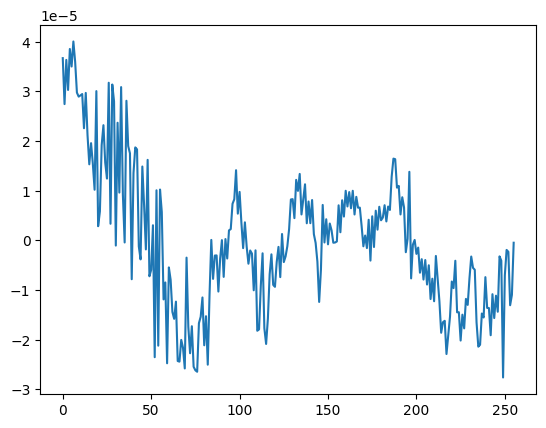

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(windows_ds[1000][0][0,:].transpose()) # first channel of first epoch
plt.show()

## Load pre-saved data

If you have run the previous steps before, the data should be saved and may be reloaded here. If you are simply running this notebook for the first time, there is no need to reload the data, and this step may be skipped. However, it is quick, so you might as well execute the cell; it will have no consequences and will allow you to check that the data was saved properly.

In [ ]:
from braindecode.datautil import load_concat_dataset

print("Loading data from disk")
windows_ds = load_concat_dataset(path='data_tutorial/hbn_preprocessed_restingstate', preload=False)


Loading data from disk


## Creating a Training and Test Set

The code below creates a training and test set. We first split the data using the **train_test_split** function and then create a **TensorDataset** for both sets.

1. **Set Random Seed** – The random seed is fixed using `torch.manual_seed(random_state)` to ensure reproducibility in dataset splitting and model training.
2. **Get Balanced Indices for Male and Female Subjects** – We ensure a 50/50 split of male and female subjects in both the training and test sets. Additionally, we prevent subject leakage, meaning the same subjects do not appear in both sets. The dataset is split into training (90%) and testing (10%) subsets using `train_test_split()`, ensuring balanced stratification based on gender.
3. **Convert Data to PyTorch Tensors** – The selected training and testing samples are converted into `FloatTensor` for input features and `LongTensor` for labels, making them compatible with PyTorch models.
4. **Create DataLoaders** – The datasets are wrapped in PyTorch `DataLoader` objects with a batch size of 100, allowing efficient mini-batch training and shuffling. Although there are only 136 subjects, the dataset contains more than 10,000 2-second samples.


In [4]:
from braindecode.datasets import BaseDataset, BaseConcatDataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import numpy as np
import torch

# random seed for reproducibility
random_state = 0
np.random.seed(random_state)
torch.manual_seed(random_state)

# Get balanced indices for male and female subjects and create a balanced dataset
male_subjects   = windows_ds.description['subject'][windows_ds.description['sex'] == 'M']
female_subjects = windows_ds.description['subject'][windows_ds.description['sex'] == 'F']
n_samples = min(len(male_subjects), len(female_subjects))
balanced_subjects = np.concatenate([male_subjects[:n_samples], female_subjects[:n_samples]])
balanced_gender = ['M'] * n_samples + ['F'] * n_samples
train_subj, val_subj, train_gender, val_gender = train_test_split(balanced_subjects, balanced_gender, train_size=0.9, stratify=balanced_gender, random_state=random_state)

# Create datasets
train_ds = BaseConcatDataset([ds for ds in windows_ds.datasets if ds.description.subject in train_subj])
val_ds = BaseConcatDataset([ds for ds in windows_ds.datasets if ds.description.subject in val_subj])

# Create dataloaders
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True)
val_loader =  DataLoader(val_ds, batch_size=100, shuffle=True)

# Check the balance of the dataset
assert len(balanced_subjects) == len(balanced_gender)
print(f"Number of subjects in balanced dataset: {len(balanced_subjects)}")
print(f"Gender distribution in balanced dataset: {np.unique(balanced_gender, return_counts=True)}")

Number of subjects in balanced dataset: 92
Gender distribution in balanced dataset: (array(['F', 'M'], dtype='<U1'), array([46, 46]))


# Check labels

It is good practice to verify the labels and ensure the random seed is functioning correctly. If all labels are 'M' (male) or 'F' (female), it could indicate an issue with data loading or stratification, requiring further investigation.

In [5]:
# get the first batch to check the labels
dataiter = iter(train_loader)
first_item, label, sz = dataiter.__next__()
np.array(label).T

array(['F', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F',
       'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'M',
       'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F',
       'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'M', 'F',
       'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'M',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F',
       'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M'], dtype='<U1')

# Create model

The model is a custom convolutional neural network with 24 input channels (EEG channels), 2 output classes (male vs. female), and an input window size of 256 samples (2 seconds of EEG data). See the reference below for more information.

[1] Truong, D., Milham, M., Makeig, S., & Delorme, A. (2021). Deep Convolutional Neural Network Applied to Electroencephalography: Raw Data vs Spectral Features. IEEE Engineering in Medicine and Biology Society. Annual International Conference, 2021, 1039–1042. https://doi.org/10.1109/EMBC46164.2021.9630708



In [18]:
# create model
from torchinfo import summary
from torch import nn

model = nn.Sequential(
    # First VGG block
    nn.Conv2d(1, 16, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    # Second VGG block
    nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    # Third VGG block
    nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    # Flatten and FC layers
    nn.Flatten(),
    nn.Linear(64 * 3 * 32, 1024), nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 1024), nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 2)
)

print(summary(model, input_size=(1, 1, 24, 256)))


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 2]                    --
├─Conv2d: 1-1                            [1, 16, 24, 256]          160
├─ReLU: 1-2                              [1, 16, 24, 256]          --
├─Conv2d: 1-3                            [1, 16, 24, 256]          2,320
├─ReLU: 1-4                              [1, 16, 24, 256]          --
├─MaxPool2d: 1-5                         [1, 16, 12, 128]          --
├─Conv2d: 1-6                            [1, 32, 12, 128]          4,640
├─ReLU: 1-7                              [1, 32, 12, 128]          --
├─Conv2d: 1-8                            [1, 32, 12, 128]          9,248
├─ReLU: 1-9                              [1, 32, 12, 128]          --
├─MaxPool2d: 1-10                        [1, 32, 6, 64]            --
├─Conv2d: 1-11                           [1, 64, 6, 64]            18,496
├─ReLU: 1-12                             [1, 64, 6, 64]            --
├

# Model Training and Evaluation Process

This section trains the neural network using the Adamax optimizer, normalizes input data, computes cross-entropy loss, updates model parameters, and tracks accuracy across six epochs.

1. **Set Up Optimizer and Learning Rate Scheduler** – The `Adamax` optimizer initializes with a learning rate of 0.002 and weight decay of 0.001 for regularization.  

2. **Allocate Model to Device** – The model moves to the specified device (CPU, GPU, or MPS for Mac silicon) to optimize computation efficiency.  

3. **Normalize Input Data** – The `normalize_data` function standardizes input data by subtracting the mean and dividing by the standard deviation along the time dimension before transferring it to the appropriate device.  

4. **Train the Model for Two Epochs** – The training loop iterates through data batches with the model in training mode. It normalizes inputs, computes predictions, calculates cross-entropy loss, performs backpropagation, updates model parameters, and steps the learning rate scheduler. It tracks correct predictions to compute accuracy.  

5. **Evaluate on Test Data** – After each epoch, the model runs in evaluation mode on the test set. It computes predictions on normalized data and calculates test accuracy by comparing outputs with actual labels.  


In [ ]:
from torch.nn import functional as F
optimizer = torch.optim.Adamax(model.parameters(), lr=0.002, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
model.to(device=device)

def normalize_data(x):
    x = x.reshape(x.shape[0], 24, 256)
    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True) + 1e-7  # add small epsilon for numerical stability
    x = (x - mean) / std
    x = x.to(device=device, dtype=torch.float32)  # move to device, e.g. GPU
    return x

# dictionary of genders for converting sample labels to numerical values
gender_dict = {'M': 0, 'F': 1}

epochs = 30
for e in range(epochs):
    
    # training
    correct_train = 0
    for t, (x, y, sz) in enumerate(train_loader):
        model.train()  # put model to training mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_train += (preds == y).sum()/len(train_ds)

        # Calculates the cross-entropy loss and performs backpropagation
        loss = F.cross_entropy(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if t % 50 == 0:
            print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
    
    # validation
    correct_test = 0
    for t, (x, y, sz) in enumerate(val_loader):
        model.eval() # put model to testing mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_test += (preds == y).sum()/len(val_ds)

    print(f'Epoch {e}, Train accuracy: {correct_train:.2f}, Test accuracy: {correct_test:.2f}\n')


In [ ]:

from torch.nn import functional as F
from braindecode.models import Deep4Net
from braindecode.models import ShallowFBCSPNet
# model = Deep4Net(n_chans=128, n_outputs=2, n_times=500) 
model = ShallowFBCSPNet(n_chans=24,  n_outputs=2, n_times=256)
optimizer = torch.optim.Adamax(model.parameters(), lr=0.002, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
model.to(device=device)

def normalize_data(x):
    x = x.reshape(x.shape[0], 24, 256)
    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True) + 1e-7  # add small epsilon for numerical stability
    x = (x - mean) / std
    x = x.to(device=device, dtype=torch.float32)  # move to device, e.g. GPU
    return x

# dictionary of genders for converting sample labels to numerical values
gender_dict = {'M': 0, 'F': 1}

epochs = 30
for e in range(epochs):
    
    # training
    correct_train = 0
    for t, (x, y, sz) in enumerate(train_loader):
        model.train()  # put model to training mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_train += (preds == y).sum()/len(train_ds)

        # Calculates the cross-entropy loss and performs backpropagation
        loss = F.cross_entropy(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if t % 50 == 0:
            print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
    
    # validation
    correct_test = 0
    for t, (x, y, sz) in enumerate(val_loader):
        model.eval() # put model to testing mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_test += (preds == y).sum()/len(val_ds)

    print(f'Epoch {e}, Train accuracy: {correct_train:.2f}, Test accuracy: {correct_test:.2f}\n')


Epoch 0, Iteration 0, loss = 15.7879
Epoch 0, Iteration 50, loss = 3.8116
Epoch 0, Iteration 100, loss = 2.7747
Epoch 0, Iteration 150, loss = 1.7477
Epoch 0, Train accuracy: 0.70, Test accuracy: 0.43

Epoch 1, Iteration 0, loss = 1.3729
Epoch 1, Iteration 50, loss = 1.5235
Epoch 1, Iteration 100, loss = 1.2615
Epoch 1, Iteration 150, loss = 1.7819
Epoch 1, Train accuracy: 0.82, Test accuracy: 0.73

Epoch 2, Iteration 0, loss = 0.5760
Epoch 2, Iteration 50, loss = 1.0722
Epoch 2, Iteration 100, loss = 1.3415
Epoch 2, Iteration 150, loss = 0.8278
Epoch 2, Train accuracy: 0.85, Test accuracy: 0.62

Epoch 3, Iteration 0, loss = 0.4127
Epoch 3, Iteration 50, loss = 1.2108
Epoch 3, Iteration 100, loss = 0.8834
Epoch 3, Iteration 150, loss = 1.3332
Epoch 3, Train accuracy: 0.87, Test accuracy: 0.43

Epoch 4, Iteration 0, loss = 0.8843
Epoch 4, Iteration 50, loss = 0.7132
Epoch 4, Iteration 100, loss = 0.9742
Epoch 4, Iteration 150, loss = 0.8537
Epoch 4, Train accuracy: 0.87, Test accuracy: 

In [34]:
from pathlib import Path
from braindecode.datautil import load_concat_dataset
datasets = ['ds005505', 'ds005506', 'ds005507', 'ds005508', 'ds005509', 'ds005510', 'ds005511', 'ds005512', 'ds005514', 'ds005515', 'ds005516']
val_release = 'ds005505'
all_ds = BaseConcatDataset([load_concat_dataset(path=Path('data') / f'{dsnumber}_preprocessed', preload=False) for dsnumber in datasets if dsnumber != val_release])
for ds in all_ds.datasets:
        ds.target_name = 'sex'
windows_ds = create_fixed_length_windows(all_ds, start_offset_samples=0, stop_offset_samples=None,
        window_size_samples=500, window_stride_samples=500, drop_last_window=True, preload=False)

In [37]:
# Get balanced indices for male and female subjects and create a balanced dataset
male_subjects   = windows_ds.description['subject'][windows_ds.description['sex'] == 'M']
female_subjects = windows_ds.description['subject'][windows_ds.description['sex'] == 'F']
n_samples = min(len(male_subjects), len(female_subjects))
balanced_subjects = np.concatenate([male_subjects[:n_samples], female_subjects[:n_samples]])
balanced_gender = ['M'] * n_samples + ['F'] * n_samples
train_subj, val_subj, train_gender, val_gender = train_test_split(balanced_subjects, balanced_gender, train_size=0.9, stratify=balanced_gender, random_state=random_state)

# Create datasets
train_ds = BaseConcatDataset([ds for ds in windows_ds.datasets if ds.description.subject in train_subj])
val_ds = BaseConcatDataset([ds for ds in windows_ds.datasets if ds.description.subject in val_subj])

# Create dataloaders
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True)
val_loader =  DataLoader(val_ds, batch_size=100, shuffle=True)

# Check the balance of the dataset
assert len(balanced_subjects) == len(balanced_gender)
print(f"Number of subjects in balanced dataset: {len(balanced_subjects)}")
print(f"Gender distribution in balanced dataset: {np.unique(balanced_gender, return_counts=True)}")

Number of subjects in balanced dataset: 1908
Gender distribution in balanced dataset: (array(['F', 'M'], dtype='<U1'), array([954, 954]))


In [ ]:
from torch.nn import functional as F
from braindecode.models import Deep4Net
from braindecode.models import ShallowFBCSPNet
model = ShallowFBCSPNet(n_chans=129,  n_outputs=2, n_times=500)
optimizer = torch.optim.Adamax(model.parameters(), lr=0.002, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
model.to(device=device)

def normalize_data(x):
    x = x.reshape(x.shape[0], 129, 500)
    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True) + 1e-7  # add small epsilon for numerical stability
    x = (x - mean) / std
    x = x.to(device=device, dtype=torch.float32)  # move to device, e.g. GPU
    return x

# dictionary of genders for converting sample labels to numerical values
gender_dict = {'M': 0, 'F': 1}

epochs = 1
for e in range(epochs):
    
    # training
    correct_train = 0
    for t, (x, y, sz) in enumerate(train_loader):
        # print('y', y)
        model.train()  # put model to training mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_train += (preds == y).sum()/len(train_ds)

        # Calculates the cross-entropy loss and performs backpropagation
        loss = F.cross_entropy(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if t % 50 == 0:
            print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
    
    # validation
    correct_test = 0
    for t, (x, y, sz) in enumerate(val_loader):
        model.eval() # put model to testing mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_test += (preds == y).sum()/len(val_ds)

    print(f'Epoch {e}, Train accuracy: {correct_train:.2f}, Test accuracy: {correct_test:.2f}\n')


Epoch 0, Iteration 0, loss = 1.2910
Epoch 0, Iteration 50, loss = 0.7122
Epoch 0, Iteration 100, loss = 0.5581
Epoch 0, Iteration 150, loss = 0.7227
Epoch 0, Iteration 200, loss = 0.7047
Epoch 0, Iteration 250, loss = 0.6136
Epoch 0, Iteration 300, loss = 0.3865
Epoch 0, Iteration 350, loss = 0.5988
Epoch 0, Iteration 400, loss = 0.5929
Epoch 0, Iteration 450, loss = 0.3984
Epoch 0, Iteration 500, loss = 0.7478
Epoch 0, Iteration 550, loss = 0.3211
Epoch 0, Iteration 600, loss = 0.2510
Epoch 0, Iteration 650, loss = 0.1967
Epoch 0, Iteration 700, loss = 0.2158
Epoch 0, Iteration 750, loss = 0.4182
Epoch 0, Iteration 800, loss = 0.2070
Epoch 0, Iteration 850, loss = 0.2514
Epoch 0, Iteration 900, loss = 0.3896
Epoch 0, Iteration 950, loss = 0.3349
Epoch 0, Iteration 1000, loss = 0.2639
Epoch 0, Iteration 1050, loss = 0.1900
Epoch 0, Iteration 1100, loss = 0.3029
Epoch 0, Iteration 1150, loss = 0.2682
Epoch 0, Iteration 1200, loss = 0.3472
Epoch 0, Iteration 1250, loss = 0.3483
Epoch 0, 

KeyboardInterrupt: 

In [43]:
from torch.nn import functional as F
from braindecode.models import Deep4Net
model = Deep4Net(n_chans=129,  n_outputs=2, n_times=500)
optimizer = torch.optim.Adamax(model.parameters(), lr=0.002, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
model.to(device=device)

def normalize_data(x):
    x = x.reshape(x.shape[0], 129, 500)
    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True) + 1e-7  # add small epsilon for numerical stability
    x = (x - mean) / std
    x = x.to(device=device, dtype=torch.float32)  # move to device, e.g. GPU
    return x

# dictionary of genders for converting sample labels to numerical values
gender_dict = {'M': 0, 'F': 1}

epochs = 1
for e in range(epochs):
    
    # training
    correct_train = 0
    for t, (x, y, sz) in enumerate(train_loader):
        # print('y', y)
        model.train()  # put model to training mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_train += (preds == y).sum()/len(train_ds)

        # Calculates the cross-entropy loss and performs backpropagation
        loss = F.cross_entropy(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if t % 50 == 0:
            print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
    
    # validation
    correct_test = 0
    for t, (x, y, sz) in enumerate(val_loader):
        model.eval() # put model to testing mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_test += (preds == y).sum()/len(val_ds)

    print(f'Epoch {e}, Train accuracy: {correct_train:.2f}, Test accuracy: {correct_test:.2f}\n')


Epoch 0, Iteration 0, loss = 1.0131
Epoch 0, Iteration 50, loss = 0.7150
Epoch 0, Iteration 100, loss = 0.6809
Epoch 0, Iteration 150, loss = 0.3824
Epoch 0, Iteration 200, loss = 0.2773
Epoch 0, Iteration 250, loss = 0.3899
Epoch 0, Iteration 300, loss = 0.2938
Epoch 0, Iteration 350, loss = 0.3554
Epoch 0, Iteration 400, loss = 0.2972
Epoch 0, Iteration 450, loss = 0.3202
Epoch 0, Iteration 500, loss = 0.4116
Epoch 0, Iteration 550, loss = 0.2189
Epoch 0, Iteration 600, loss = 0.2329
Epoch 0, Iteration 650, loss = 0.3521
Epoch 0, Iteration 700, loss = 0.2589
Epoch 0, Iteration 750, loss = 0.2897
Epoch 0, Iteration 800, loss = 0.2258
Epoch 0, Iteration 850, loss = 0.2551
Epoch 0, Iteration 900, loss = 0.3206
Epoch 0, Iteration 950, loss = 0.1834
Epoch 0, Iteration 1000, loss = 0.2029
Epoch 0, Iteration 1050, loss = 0.1768
Epoch 0, Iteration 1100, loss = 0.2997
Epoch 0, Iteration 1150, loss = 0.2116
Epoch 0, Iteration 1200, loss = 0.2438
Epoch 0, Iteration 1250, loss = 0.1748
Epoch 0, 

In [44]:
from torch.nn import functional as F
from braindecode.models import Deep4Net
from torchmetrics.functional.classification import binary_accuracy
from torchmetrics.functional import f1_score
model = Deep4Net(n_chans=129,  n_outputs=2, n_times=500)
optimizer = torch.optim.Adamax(model.parameters(), lr=0.002, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
model.to(device=device)

def normalize_data(x):
    x = x.reshape(x.shape[0], 129, 500)
    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True) + 1e-7  # add small epsilon for numerical stability
    x = (x - mean) / std
    x = x.to(device=device, dtype=torch.float32)  # move to device, e.g. GPU
    return x

# dictionary of genders for converting sample labels to numerical values
gender_dict = {'M': 0, 'F': 1}

epochs = 1
for e in range(epochs):
    
    # training
    correct_train = 0
    for t, (x, y, sz) in enumerate(train_loader):
        # print('y', y)
        model.train()  # put model to training mode
        scores = model(normalize_data(x))
        preds = torch.argmax(scores, dim=1) 
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_train += (preds == y).sum()/len(train_ds)

        # Calculates the cross-entropy loss and performs backpropagation
        loss = F.cross_entropy(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if t % 50 == 0:
            print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
            print('Epoch %d, Iteration %d, train_accuracy = %.4f' % (e, t, binary_accuracy(preds, y)))
            print('Epoch %d, Iteration %d, train_f1 = %.4f' % (e, t, f1_score(preds, y, task='binary')))

    # validation
    correct_test = 0
    for t, (x, y, sz) in enumerate(val_loader):
        model.eval() # put model to testing mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_test += (preds == y).sum()/len(val_ds)

    print(f'Epoch {e}, Train accuracy: {correct_train:.2f}, Test accuracy: {correct_test:.2f}\n')


Epoch 0, Iteration 0, loss = 0.7840
Epoch 0, Iteration 0, train_accuracy = 0.5500
Epoch 0, Iteration 0, train_f1 = 0.4578
Epoch 0, Iteration 50, loss = 0.6707
Epoch 0, Iteration 50, train_accuracy = 0.6700
Epoch 0, Iteration 50, train_f1 = 0.6667
Epoch 0, Iteration 100, loss = 0.5923
Epoch 0, Iteration 100, train_accuracy = 0.6800
Epoch 0, Iteration 100, train_f1 = 0.6735
Epoch 0, Iteration 150, loss = 0.5546
Epoch 0, Iteration 150, train_accuracy = 0.7400
Epoch 0, Iteration 150, train_f1 = 0.7451
Epoch 0, Iteration 200, loss = 0.4590
Epoch 0, Iteration 200, train_accuracy = 0.8400
Epoch 0, Iteration 200, train_f1 = 0.8491
Epoch 0, Iteration 250, loss = 0.4901
Epoch 0, Iteration 250, train_accuracy = 0.8300
Epoch 0, Iteration 250, train_f1 = 0.8411
Epoch 0, Iteration 300, loss = 0.3217
Epoch 0, Iteration 300, train_accuracy = 0.8500
Epoch 0, Iteration 300, train_f1 = 0.8454
Epoch 0, Iteration 350, loss = 0.3729
Epoch 0, Iteration 350, train_accuracy = 0.8100
Epoch 0, Iteration 350, tra

In [54]:
from torch.nn import functional as F
from braindecode.models import Deep4Net
from torchmetrics.functional.classification import binary_accuracy
from torchmetrics.functional import f1_score
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
import lightning as L
from libs.ssl_task import SSLTask, Classification
model = Classification.ClassificationLit(encoder_path='braindecode.models.Deep4Net', encoder_kwargs={'n_chans': 129, 'n_outputs': 2, 'n_times': 500}, learning_rate=0.002)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
model.to(device=device)
optimizer = torch.optim.Adamax(model.parameters(), lr=0.002, weight_decay=0.001)

def normalize_data(x):
    x = x.reshape(x.shape[0], 129, 500)
    mean = x.mean(dim=-1, keepdim=True)
    std = x.std(dim=-1, keepdim=True) + 1e-7  # add small epsilon for numerical stability
    x = (x - mean) / std
    x = x.to(device=device, dtype=torch.float32)  # move to device, e.g. GPU
    return x

# dictionary of genders for converting sample labels to numerical values
gender_dict = {'M': 0, 'F': 1}

epochs = 1
for e in range(epochs):
    
    # training
    correct_train = 0
    for t, (x, y, sz) in enumerate(train_loader):
        # print('y', y)
        model.train()  # put model to training mode
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        loss, scores = model.training_step((x.to(device=device, dtype=torch.float32), y, sz), t)
        preds = torch.argmax(scores, dim=1) 
        correct_train += (preds == y).sum()/len(train_ds)

        # Calculates the cross-entropy loss and performs backpropagation
        loss = F.cross_entropy(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if t % 50 == 0:
            print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
            print('Epoch %d, Iteration %d, train_accuracy = %.4f' % (e, t, binary_accuracy(preds, y)))
            print('Epoch %d, Iteration %d, train_f1 = %.4f' % (e, t, f1_score(preds, y, task='binary')))

    # validation
    correct_test = 0
    for t, (x, y, sz) in enumerate(val_loader):
        model.eval() # put model to testing mode
        scores = model(normalize_data(x))
        _, preds = scores.max(1)
        y = torch.tensor([gender_dict[gender] for gender in y], device=device, dtype=torch.long)
        correct_test += (preds == y).sum()/len(val_ds)

    print(f'Epoch {e}, Train accuracy: {correct_train:.2f}, Test accuracy: {correct_test:.2f}\n')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Epoch 0, Iteration 0, loss = 0.9252
Epoch 0, Iteration 0, train_accuracy = 0.4400
Epoch 0, Iteration 0, train_f1 = 0.4400
Epoch 0, Iteration 50, loss = 0.8271
Epoch 0, Iteration 50, train_accuracy = 0.6300
Epoch 0, Iteration 50, train_f1 = 0.5934
Epoch 0, Iteration 100, loss = 0.7186
Epoch 0, Iteration 100, train_accuracy = 0.6400
Epoch 0, Iteration 100, train_f1 = 0.5714
Epoch 0, Iteration 150, loss = 0.6833
Epoch 0, Iteration 150, train_accuracy = 0.6100
Epoch 0, Iteration 150, train_f1 = 0.6355
Epoch 0, Iteration 200, loss = 0.5334
Epoch 0, Iteration 200, train_accuracy = 0.7600
Epoch 0, Iteration 200, train_f1 = 0.7000
Epoch 0, Iteration 250, loss = 0.4608
Epoch 0, Iteration 250, train_accuracy = 0.7800
Epoch 0, Iteration 250, train_f1 = 0.7609
Epoch 0, Iteration 300, loss = 0.5206
Epoch 0, Iteration 300, train_accuracy = 0.7900
Epoch 0, Iteration 300, train_f1 = 0.7342
Epoch 0, Iteration 350, l

NotImplementedError: Module [ClassificationLit] is missing the required "forward" function

In [46]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
import lightning as L
from libs.ssl_task import SSLTask, Classification
import pandas as pd
class SSLHBNDataModule(L.LightningDataModule):
    def __init__(self, 
        ssl_task: SSLTask = Classification(),
        window_len_s=2, 
        batch_size: int = 64, 
        num_workers=0,
        data_dir='/mnt/nemar/openneuro',
        cache_dir='data',
        datasets:list[str]=None,
        target_label='sex',
        overwrite_preprocessed=False,
        mapping={'M': 0, 'F': 1},
        val_release='ds005505',
        use_ssl_sampler_for_val=False,
    ):
        super().__init__()
        self.ssl_task = ssl_task
        self.window_len_s = window_len_s
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.data_dir = Path(data_dir)
        self.cache_dir = Path(cache_dir) if cache_dir is not None else self.data_dir
        self.overwrite_preprocessed = overwrite_preprocessed
        HBN_DSNUMBERS= ['ds005505', 'ds005506', 'ds005507', 'ds005508', 'ds005509', 'ds005510', 'ds005511', 'ds005512', 'ds005514', 'ds005515', 'ds005516']
        self.datasets = datasets if datasets is not None else HBN_DSNUMBERS
        self.bad_subjects = ['NDARBA381JGH', 'NDARUJ292JXV', 'NDARVN772GLC', 'NDARTD794NKQ', 'NDARBX830ZD4', 'NDARHZ923PAH', 'NDARJP304NK1', 'NDARME789TD2', 'NDARUA442ZVF', 'NDARTY128YLU', 'NDARDW550GU6','NDARLD243KRE']
        self.target_label = target_label
        self.mapping = mapping
        self.val_release = val_release
        self.use_ssl_sampler_for_val = use_ssl_sampler_for_val
        self.save_hyperparameters()

    def prepare_data(self):
        # create preprocessed data if not exists
        print(f"Using datasets: {self.datasets}")
        print(f"Validation release: {self.val_release}")
        selected_tasks = ['RestingState']
        for dsnumber in self.datasets:
            savedir = self.cache_dir / f'{dsnumber}_preprocessed'
            if not os.path.exists(savedir) or self.overwrite_preprocessed:
                # ds = HBNDataset(dsnumber, data_path=self.data_dir / dsnumber, tasks=selected_tasks, num_workers=-1, preload=False)
                ds = EEGDashDataset({'dataset': dsnumber, 'task': 'RestingState'}, cache_dir=self.data_dir, description_fields=['subject', 'session', 'run', 'task', 'age', 'gender', 'sex', 'p_factor', 'externalizing', 'internalizing', 'attention'])
                ds = BaseConcatDataset([d for d in ds.datasets if d.description['subject'] not in self.bad_subjects])
                ds = self.preprocess(ds, savedir)
        
    
    def window_scale(self, data):
        '''
        Legacy reference
        Custom scaling using window statistics ignoring Cz reference
        '''
        assert data.ndim == 3, "Data should be 3D"
        assert data.shape[1] == 129, "Data should have 129 channels"
        assert torch.allclose(data[:,-1,:], torch.tensor(0, dtype=data.dtype)), "Last channel should be Cz reference"
        data_noCz = data[:,:-1,:]  # remove Cz reference
        assert data_noCz.shape[1] == 128, "Data should have 128 channels after removing Cz reference"
        data_mean = torch.mean(data_noCz, dim=(1,2), keepdim=True)  # mean over F
        data_std = torch.std(data_noCz, dim=(1,2), keepdim=True)  # std over F
        # standard scale to 0 mean and 1 std using statistics of the entire window
        data = (data - data_mean) / data_std # normalize preserving batch dim
        return data
            
    def preprocess(self, ds, savedir):
        from sklearn.preprocessing import scale
        os.makedirs(savedir, exist_ok=True)

        sampling_rate = 250 # resample to follow the tutorial sampling rate
        # Factor to convert from uV to V
        factor = 1e6
        channels = ds.datasets[0].raw.info['ch_names']
        preprocessors = [
            Preprocessor('set_channel_types', mapping=dict(zip(channels, ['eeg']*len(channels)))),
            Preprocessor('notch_filter', freqs=(60, 120)),    
            Preprocessor('filter', l_freq=0.1, h_freq=59),
            Preprocessor('resample', sfreq=sampling_rate),
            Preprocessor('set_eeg_reference', ref_channels=['Cz']),
            # Preprocessor('crop', tmin=10),  # crop first 10 seconds as begining of noise recording
            # Preprocessor('drop_channels', ch_names=['Cz']),  # discard Cz
            # Preprocessor(lambda data: np.multiply(data, factor)),  # Convert from V to uV    
            # Preprocessor(scale, channel_wise=True), # normalization for deep learning
        ]
        # Transform the data
        preprocess(ds, preprocessors, save_dir=savedir, overwrite=True, n_jobs=1)

        return ds

    def get_and_filter_dataset(self, dataset_type='train'):
        if dataset_type == 'train':
            all_ds = BaseConcatDataset([load_concat_dataset(path=self.cache_dir / f'{dsnumber}_preprocessed', preload=False) for dsnumber in self.datasets if dsnumber != self.val_release])
        elif dataset_type == 'valid':
            all_ds = BaseConcatDataset([load_concat_dataset(path=self.cache_dir / f'{self.val_release}_preprocessed', preload=False)])

        filtered_ds = []

        # check target label validity
        if self.target_label not in all_ds.description.columns:
            raise ValueError(f"Target label {self.target_label} not found in dataset description")
        for ds in all_ds.datasets:
            # filter nan target label
            if not (pd.isna(ds.description[self.target_label]) or ds.description['subject'] in self.bad_subjects):
                if len(ds.raw.ch_names) < 128:
                    raise ValueError(f"Dataset {ds.description['subject']} has less than 128 channels")
                # add subject info for validation
                target_labels = [self.target_label, 'subject'] if dataset_type == 'valid' else self.target_label
                # set desired label target
                ds.target_name = target_labels
                filtered_ds.append(ds)

        all_ds = BaseConcatDataset(filtered_ds)

        # Extract windows
        fs = all_ds.datasets[0].raw.info['sfreq']
        window_len_samples = int(fs * self.window_len_s)
        window_stride_samples = int(fs * self.window_len_s) # non-overlapping
        windows_ds = create_fixed_length_windows(
            all_ds, start_offset_samples=0, stop_offset_samples=None,
            window_size_samples=window_len_samples,
            window_stride_samples=window_stride_samples, drop_last_window=True,
            preload=False, mapping=self.mapping)
        

        return windows_ds

    def setup(self, stage=None):
        if stage == 'fit':
            # use all datasets for training
            train_ds = self.get_and_filter_dataset('train')
            valid_ds = self.get_and_filter_dataset('valid')
            # Get balanced indices for male and female subjects and create a balanced dataset
            male_subjects   = train_ds.description['subject'][train_ds.description['sex'] == 'M']
            female_subjects = train_ds.description['subject'][train_ds.description['sex'] == 'F']
            n_samples = min(len(male_subjects), len(female_subjects))
            train_subj = np.concatenate([male_subjects[:n_samples], female_subjects[:n_samples]])
            train_gender = ['M'] * n_samples + ['F'] * n_samples
            # train_subj, val_subj, train_gender, val_gender = train_test_split(balanced_subjects, balanced_gender, train_size=1, stratify=balanced_gender)

            # Create datasets
            train_ds = BaseConcatDataset([ds for ds in train_ds.datasets if ds.description.subject in train_subj])

            # Check the balance of the dataset
            assert len(train_subj) == len(train_gender)
            print(f"Number of subjects in balanced dataset: {len(train_subj)}")
            print(f"Gender distribution in balanced dataset: {np.unique(train_gender, return_counts=True)}")

            assert set(train_ds.description['subject']).intersection(set(valid_ds.description['subject'])) == set(), "Train and valid datasets should not overlap"

            self.train_ds = train_ds
            self.valid_ds = valid_ds
        elif stage == 'test':
            valid_ds = self.get_and_filter_dataset('valid')
            self.test_ds = valid_ds

    def train_dataloader(self):
        train_sampler = self.ssl_task.sampler(self.train_ds)
        shuffle = True if train_sampler is None else False
        if train_sampler:
            print(f"Using {type(train_sampler).__name__} sampler with shuffle {shuffle} for training")
            self.train_ds = self.ssl_task.dataset(datasets=self.train_ds.datasets)
            dataloader = DataLoader(self.train_ds, sampler=train_sampler, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=shuffle)
        else:
            dataloader = DataLoader(self.train_ds, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=shuffle)
        print(f"Number of datasets: {len(self.train_ds.datasets)}")
        if train_sampler is None:
            print(f"Number of examples: {len(self.train_ds)}")
        else:
            print(f"Number of examples: {train_sampler.n_examples}")

        return dataloader

    def custom_collate_fn(self, batch):
        from torch.utils.data import default_collate
        # custom collate function to handle subject metadata for validation and test set
        # as specified in setup
        sequences, labels, indices = zip(*batch)
        if type(labels[0]) == list:
            labels, subjects = zip(*labels)
            labels = default_collate(labels)
            subjects = list(subjects) # TODO temporary fix
        else:
            dfs = pd.concat(labels)
            subjects = list(dfs['subject'])
            labels = default_collate(list(dfs[self.target_label]))
        return default_collate(sequences), labels, default_collate(indices), subjects

    def val_dataloader(self):
        val_sampler = self.ssl_task.sampler(self.valid_ds)
        if self.use_ssl_sampler_for_val and val_sampler is not None:
            self.valid_ds = self.ssl_task.dataset(datasets=self.valid_ds.datasets)
            print(f"Using {type(val_sampler).__name__} sampler for validation")
            return DataLoader(self.valid_ds, sampler=val_sampler, batch_size=self.batch_size, num_workers=self.num_workers)
        else:
            return DataLoader(self.valid_ds, batch_size=self.batch_size, collate_fn=self.custom_collate_fn, num_workers=self.num_workers)